In [1]:
# import the necessary libraries
from urllib.request import urlopen
import bs4 as bs

# take the url from wikipedia
url = 'https://en.wikipedia.org/wiki/List_of_owl_species'

# download and parse the html source
sauce = urlopen(url).read()
soup  = bs.BeautifulSoup(sauce,'lxml')

# extract the owl names from the relevant tags within the table
# note: the 'td' tags will also contain the binomial names, which I 
# managed to filter out by simply dropping all elements which as any
# year-looking objects in it (since no owl species were discoverd in the 2000s,
# filtering for '1' is just enough)
tags = soup.find_all('td')
tags = [t for t in tags if 'href' in str(t)]
owls = []

for t in tags:
    print()
    if '1' not in t.text:
        owls.append(t.text)

len(owls)

254

In [20]:
# importing the api
import wikipediaapi

# setting up the api connection
wiki_wiki = wikipediaapi.Wikipedia('owl-miniproject')


# preparing a folder to save our colleted data
import os
folderout = 'wiki_page_content' 

if not os.path.exists(folderout):  
    os.makedirs(folderout)


# a test sample
page = wiki_wiki.page('Greater sooty owl')
page.text[0:1000]

"The greater sooty owl (Tyto tenebricosa) is a medium to large owl  found in south-eastern Australia, Montane rainforests of New Guinea and have been seen on Flinders Island in the Bass Strait.  The lesser sooty owl (T. multipunctata), is sometimes considered to be conspecific with this species, in which case they are then together referred to as sooty owls. It is substantially smaller and occurs in the wet tropics region of North Queensland, Australia.\n\nDescription\nGreater sooty owls have a finely white spotted head with scattered white spots on the wings. The females are lighter colored than the males. They appear to be the heaviest of the living species in the barn owl family, however the Tasmanian subspecies of the Australian masked owl is larger still. The females' length is 41 to 50 cm (16 to 20 in) and weighs 750 to 1,200 g (1.65 to 2.65 lb). The smaller male has a length of 37 to 43 cm (15 to 17 in) and weighs 500 to 700 g (1.1 to 1.5 lb). The wing length is 30–40 cm. The la

In [29]:
for idx, owl in enumerate(owls) :
    
    if idx%20==0:
        print(idx)
    
    if not os.path.exists(folderout + '/' + owl ):
        page = wiki_wiki.page(owl)
        fout = open(folderout + '/' + owl , 'w', encoding="ISO-8859-1")
        fout.write(page.text)
        fout.close()

0
20
40
60
80
100
120
140
160
180
200
220
240


In [30]:
# let's store the textual profile of each owl in the following dictionary
names_texts = {}
for name in [f for f in os.listdir(folderout) if '.DS' not in f]:
    with open(folderout + '/' + name, encoding="ISO-8859-1") as myfile:
        names_texts[name] = myfile.read().split('External links')[0]

# import networkx as create an empty graph object
import networkx as nx
G = nx.Graph()

# now build the graph by pair-wise comparing each owl profile
edges = {}
for name1, text1 in names_texts.items():
    for name2, text2 in names_texts.items():
        
        if name1 != name2:
        
            weight = text1.count(name2) + text2.count(name1)
            if weight > 0:
                G.add_edge(name1, name2, weight = weight)


# finally, let's show the size of the graph we built
print(G.number_of_nodes(), G.number_of_edges())

166 205


(-1.2009342014059974,
 1.1868423266970871,
 -1.1892197396103703,
 1.2080254051213475)

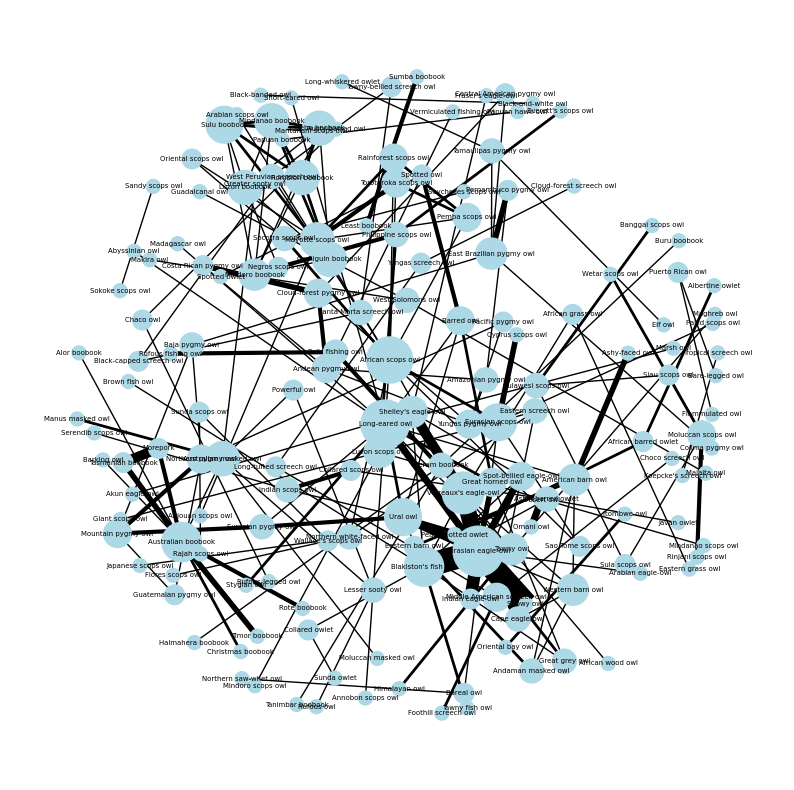

In [31]:
import matplotlib.pyplot as plt

# Define the node size proportional to the node degree
node_sizes = [100 * nx.degree(G, node) for node in G.nodes()]

# Define the edge width proportional to the edge weight
edge_widths = [G[u][v]['weight'] for u, v in G.edges()]

# Get positions for the nodes using a force layout
pos = nx.spring_layout(G, k = 0.6)

# Draw the nodes with labels
f, ax = plt.subplots(1,1,figsize=(10,10))


nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue', ax = ax)
nx.draw_networkx_labels(G, pos, font_size = 5, ax = ax)

# Draw the edges with widths proportional to the weights
nx.draw_networkx_edges(G, pos, width=edge_widths, ax = ax)

ax.axis('off')